# MICROSOFT MOVIE STUDIO

# 1. Introduction
## Business Understanding
A movie studio is a major entertainment company that makes films. The day-to-day filming operations are generally handled by their production company subsidiary. There are also independently owned studio facilities who have never produced a motion picture of their own because they are not entertainment companies, but they are companies who sell only studio space. 

Microsoft is a major company that wants in on movie creation. Their best bet in getting a return on interest on their new movie studio would be to create movies that are performing well in the box office. The genres with the highest gross in come include: Adventure, Action, Drama, Comedy and Horror. They should avoid genres such as Musicals and Documentaries as these are the least popular among viewers.

## Problem Statement
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Main Objective
To evaluate the performance of movies
## Specific Objecive

## Experimental Design


## Data Understanding
The data we are working with has come from
- (https://www.boxofficemojo.com/)
- (https://www.imdb.com/)
- (https://www.rottentomatoes.com/)
- (https://www.themoviedb.org/)
- (https://www.the-numbers.com/)

# 2. Importing The Libraries

In [63]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Reading The Data

In [64]:
# loading the data from bom movie gross
bom = pd.read_csv("bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [65]:
# loading the budget data
budget = pd.read_csv("tn.movie_budgets.csv")
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [66]:
# loading the data from tmdb movies
tmdb = pd.read_csv("tmdb.movies.csv")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [67]:
# loading the data from the imdb title basics
title_basics = pd.read_csv("title.basics.csv")
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [68]:
# loading the data from the imdb name basics
name_basics = pd.read_csv("name.basics.csv")
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [69]:
# loading the data from imdb ratings
title_ratings = pd.read_csv("title.ratings.csv")
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [70]:
# loading the data from the imdb pricipals
title_principals = pd.read_csv("title.principals.csv")
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [71]:
# loading the data from the imdb crew
title_crew = pd.read_csv("title.crew.csv")
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


# 4. Checking the data

In [99]:
# checking the tail of name_basics
name_basics.tail()

,nconst,primary_name,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,actress,NaN
606644,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,producer,NaN
606647,nm9993380,Pegasus Envoyé,"director,actor,writer",tt8743182


In [72]:
name_basics.shape

(606648, 6)

In [93]:
# checking the datatypes in the name_basics table
name_basics.dtypes

nconst                object
primary_name          object
primary_profession    object
known_for_titles      object
dtype: object

In [100]:
# checking the tail of bom
bom.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [94]:
# checking the dtypes in the bom table
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [95]:
# checking the shape of the bom table
bom.shape

(3387, 5)

In [101]:
# checking the tail of budget
budget.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [102]:
# checking the shape of the budget
budget.shape

(5782, 6)

In [124]:
# checking the number of unique values in budget
budget.id.nunique()

100

In [92]:
# checking the datatypes in the budget table
budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [103]:
# checking the tail of the title_ratings
title_ratings.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [97]:
# checking the shape of the title_ratings table
title_ratings.shape

(73856, 3)

In [126]:
# checking the unique values in title_ratings
title_ratings.tconst.nunique()

73856

In [98]:
# checking the datatypes of the title_ratings table
title_ratings.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [104]:
# checking the tail of title_basics
title_basics.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [105]:
# checking the number of rows and columns in title_basics
title_basics.shape

(146144, 6)

In [106]:
# checking the data types in title_basics
title_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [107]:
# checking the tail of tmdb
tmdb.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [108]:
# checking the number of rows and columns of tmdb
tmdb.shape

(26517, 10)

In [109]:
# checking the data types in tmdb
tmdb.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [110]:
# checking the tail of title_principals
title_principals.tail()

,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


In [111]:
# checking the number of rows and columns in title_principals
title_principals.shape

(1028186, 6)

In [112]:
# checking the data types of title_principals
title_principals.dtypes

tconst        object
ordering       int64
nconst        object
category      object
job           object
characters    object
dtype: object

In [113]:
# checking the tail of title_crew
title_crew.tail()

,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


In [114]:
# checking the number of rows and columns for title_crew
title_crew.shape

(146144, 3)

In [115]:
# checking the data types for title_crew
title_crew.dtypes

tconst       object
directors    object
writers      object
dtype: object

# 5. Tidying the dataset

In [127]:
# Merging the title_basics and the title_ratings dataframes
title_basics_ratings = pd.merge(title_basics, title_ratings)
title_basics_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [128]:
# checking for missing values in title_basics_ratings
title_basics_ratings.isnull().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [155]:
title_basics_ratings.genres.value_counts()

genres
Drama                       11612
Documentary                 10313
Comedy                       5613
Horror                       2692
Comedy,Drama                 2617
                            ...  
Biography,Comedy,Horror         1
Comedy,History,Sport            1
Biography,Family,Fantasy        1
Drama,Short                     1
Comedy,Musical,Sport            1
Name: count, Length: 923, dtype: int64

In [130]:
title_basics_ratings.genres.nunique()

923

In [153]:
# sorting title_basics_ratings by averagerating
title_basics_ratings = title_basics_ratings.sort_values(by=['averagerating'], ascending=False)
title_basics_ratings.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
878,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5
42970,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6
71577,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5
51109,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7
27335,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
53689,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5
49925,tt4944240,Dog Days in the Heartland,Dog Days in the Heartland,2017,NaN,Drama,10.0,5
64646,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5
50085,tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8
73616,tt9715646,Renegade,Renegade,2019,NaN,Documentary,10.0,20


TypeError: 'value' must be an instance of str or bytes, not a float

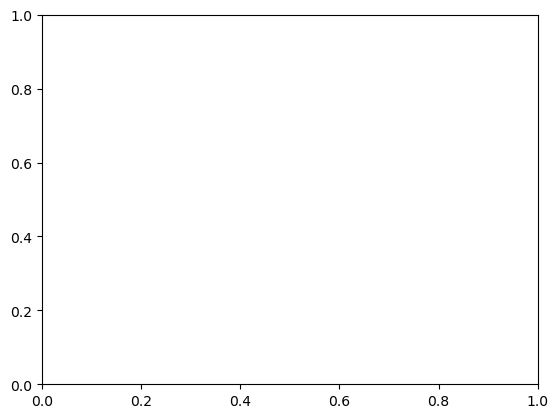

In [158]:
title_basics_ratings.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [162]:
# checking for duplicates in bom dataframe
bom.title.duplicated().sum()

1

In [169]:
# keeping the first row with duplicate entry in bom dataframe
bom.loc[bom.title.duplicated(keep='first'), :]

,title,studio,domestic_gross,foreign_gross,year
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [180]:
# checking the best 20 movies with the highest domestic gross
bom_top20 = bom.nlargest(20, 'domestic_gross')['title'].tolist()
bom_top20


['Star Wars: The Force Awakens',
 'Black Panther',
 'Avengers: Infinity War',
 'Jurassic World',
 "Marvel's The Avengers",
 'Star Wars: The Last Jedi',
 'Incredibles 2',
 'Rogue One: A Star Wars Story',
 'Beauty and the Beast (2017)',
 'Finding Dory',
 'Avengers: Age of Ultron',
 'The Dark Knight Rises',
 'The Hunger Games: Catching Fire',
 'Jurassic World: Fallen Kingdom',
 'Toy Story 3',
 'Wonder Woman',
 'Iron Man 3',
 'Captain America: Civil War',
 'The Hunger Games',
 'Jumanji: Welcome to the Jungle']

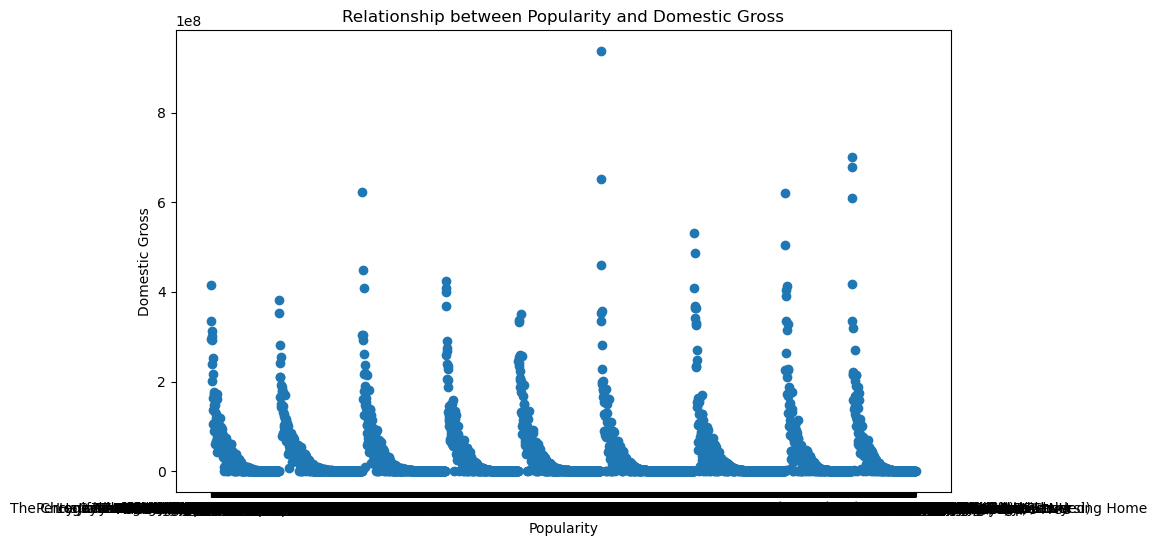

In [181]:
# checking for outliers in bom via scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(bom['title'], bom['domestic_gross'])
plt.xlabel('Popularity')
plt.ylabel('Domestic Gross')
plt.title('Relationship between Popularity and Domestic Gross')
plt.show()

In [134]:
# checking each genre of movie and their respective average rating
pd.crosstab(title_basics_ratings.genres, title_basics_ratings.averagerating)

averagerating,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0
genres,,,,,,,,,,,,,,,,,,,,,
Action,0,1,0,0,0,0,1,1,0,1,...,2,2,0,0,0,1,0,1,0,0
"Action,Adult,Comedy",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure,Animation",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure,Biography",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thriller,1,0,0,1,2,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
"Thriller,War",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Thriller,Western",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# grouping the averagerating by genres in title_basics_ratings
title_basics_ratings.groupby('genres').averagerating.mean()

genres
Action                        5.757712
Action,Adult,Comedy           4.650000
Action,Adventure              5.223529
Action,Adventure,Animation    6.562874
Action,Adventure,Biography    7.061905
                                ...   
Thriller                      5.704244
Thriller,War                  5.650000
Thriller,Western              7.150000
War                           6.134043
Western                       5.037333
Name: averagerating, Length: 923, dtype: float64

In [89]:
title_basics_ratings.runtime_minutes.describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [138]:
# removing $ from budget table
budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$', '')

In [142]:
# removing commas from the budget dataframe
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',', '')

In [173]:
# changing the data types of production_budget, domestic_gross and worldwide_gross
budget['production_budget'] = budget['production_budget'].astype(float)
budget['domestic_gross'] = budget['domestic_gross'].astype(float)

In [174]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


In [ ]:
# creating new column called 'total_gross' in budget dataframe
budget['total_gross'] = budget['domestic_gross'] + budget['worldwide_gross']
budget.head()

# 6. Exploratory Analysis

<Axes: xlabel='genres'>

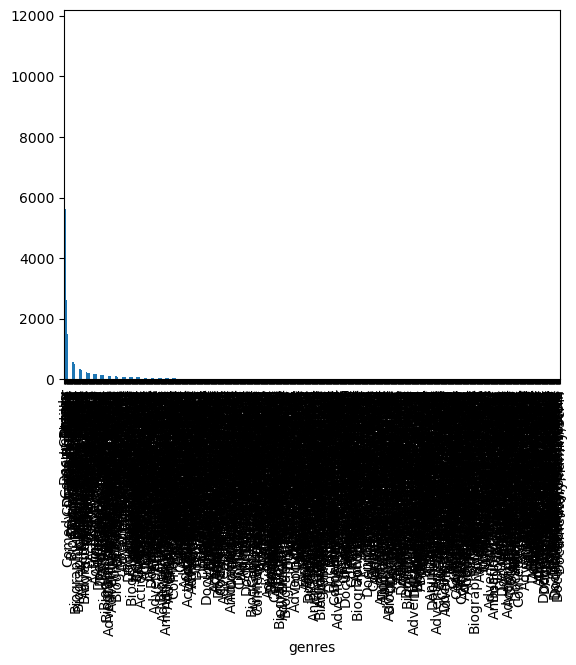

In [91]:
title_basics_ratings.genres.value_counts().plot(kind='bar')

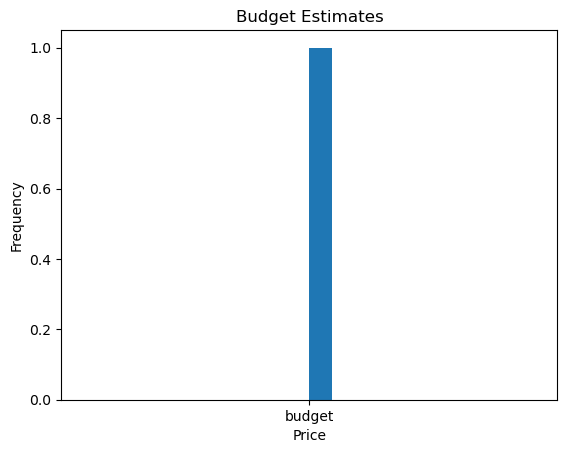

In [149]:
# plotting a histogram for the budget
plt.hist('budget', bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Budget Estimates')
plt.show()

In [175]:
Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_df['title'], top_10_df['domestic_gross'])
plt.xlabel('Title')
plt.ylabel('Domestic Gross')
plt.title('Top 10 Most Popular Movies and Their Domestic Gross Incomes')
plt.xticks(rotation=90)
plt.tight_layout()

SyntaxError: invalid syntax (2641191424.py, line 1)

TypeError: 'value' must be an instance of str or bytes, not a float

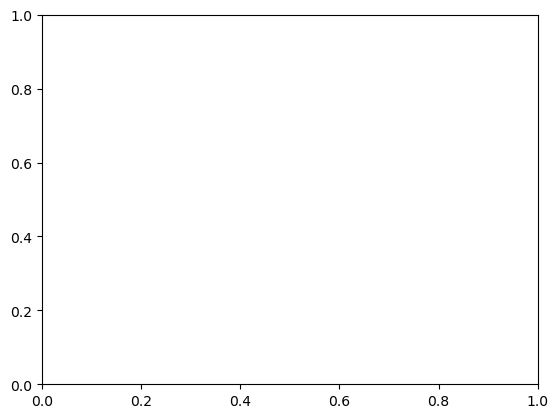

In [177]:
plt.hist(title_basics_ratings['genres'], title_basics_ratings['averagerating'])
plt.show()

# 7. Follow Up Questions